### Tasks:
Perform a forecast time series analysis using DeepLearning

### Data Description: 

The FAOSTAT domain Emissions Totals summarizes the greenhouse gas (GHG) emissions disseminated in the FAOSTAT Climate Change Emissions domains, generated from agriculture and forest land. They consist of methane (CH4), nitrous oxide (N2O) and carbon dioxide (CO2) emissions from crop and livestock activities, forest management and include land use and land use change processes. The time coverage is 1961-2019 with yearly periodicity. 

Source: https://www.fao.org/faostat/en/#data/GT/metadata

### Models:


In [237]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chart_studio
import chart_studio.plotly as py

In [8]:
# cols = ['Area Code (FAO)','Area','Element Code','Element','Item Code','Item','Year','Value']
# df = pd.read_csv('FAOSTAT_data_11-19-2021.csv', usecols=cols)
# df.to_csv('FAOSTAT_data.csv',index=False)

In [2]:
df = pd.read_csv('FAOSTAT_data.csv')

In [16]:
italy = df[df.Area=='Italy']
italy.to_csv('italy_FAO.csv',index=False)
italy.head()

,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year,Value
90012,106,Italy,7225,Emissions (CH4),5058,Enteric Fermentation,1961,860.8925
90013,106,Italy,7225,Emissions (CH4),5058,Enteric Fermentation,1962,846.6657
90014,106,Italy,7225,Emissions (CH4),5058,Enteric Fermentation,1963,816.6075
90015,106,Italy,7225,Emissions (CH4),5058,Enteric Fermentation,1964,780.4037
90016,106,Italy,7225,Emissions (CH4),5058,Enteric Fermentation,1965,819.2011


Dati da cancellare perchè 0 e non rilevanti per l'italia

*6750 = 	Net Forest conversion  

*6993 =  Fires in organic soils

*67291 = Drained organic soils (N2O)

*69921 = Fires in humid tropical forests 

In [ ]:
#df_italy.drop(df_italy[df_italy['Item Code'] == 69921].index, inplace=True)

In [269]:
cols = ['Element Code','Element','Item Code','Item','Year','Value']
df_italy = pd.read_csv('italy_FAO.csv',usecols=cols)

# take data from 1990
#df_italy = df_italy[df_italy.Year >= 1990]

In [276]:
#df_italy.to_csv('Italy_modified.csv',index=False)

In [278]:
df_italy = pd.read_csv('Italy_modified.csv',usecols=cols)

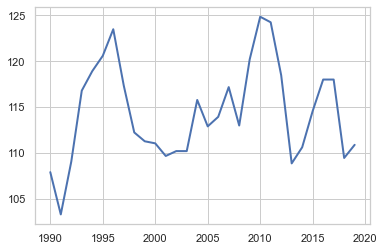

In [279]:
# plot CH4 Emission for the rice cultivation in italy from 1990 to 2019
rice = df_italy[df_italy.Item == 'Rice Cultivation']
x = rice.Year
y = rice.Value
fig, ax= plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.show()

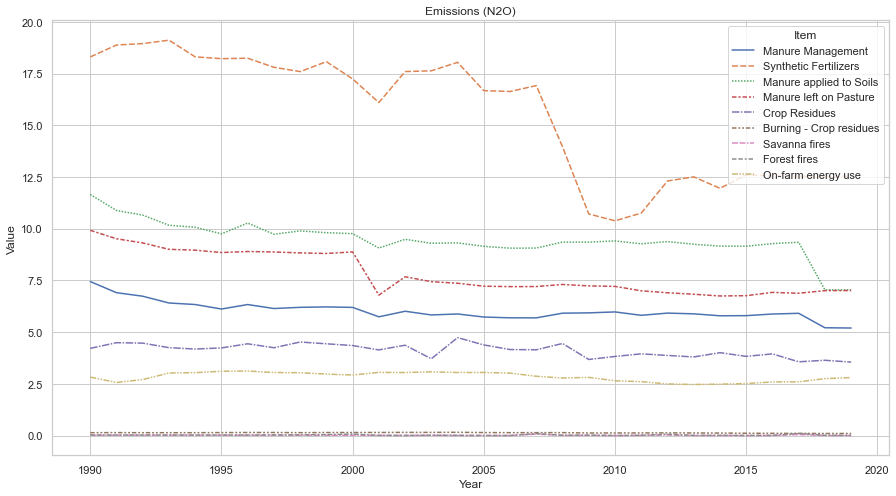

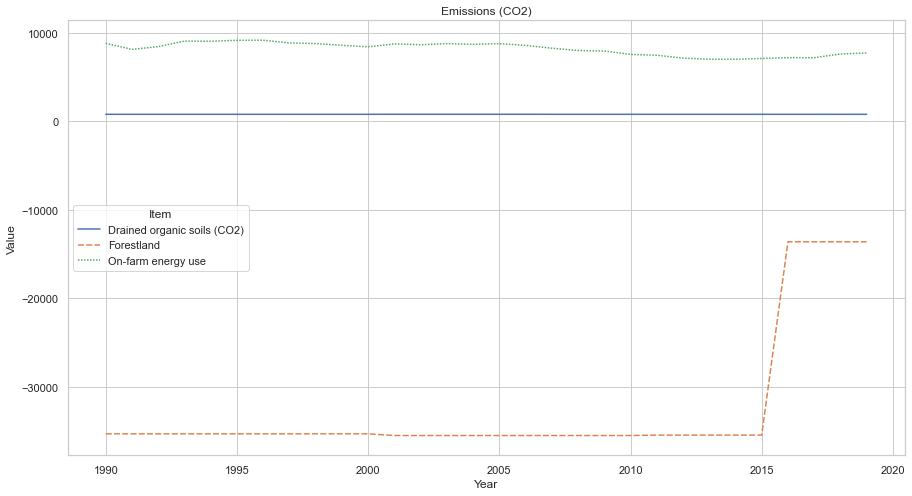

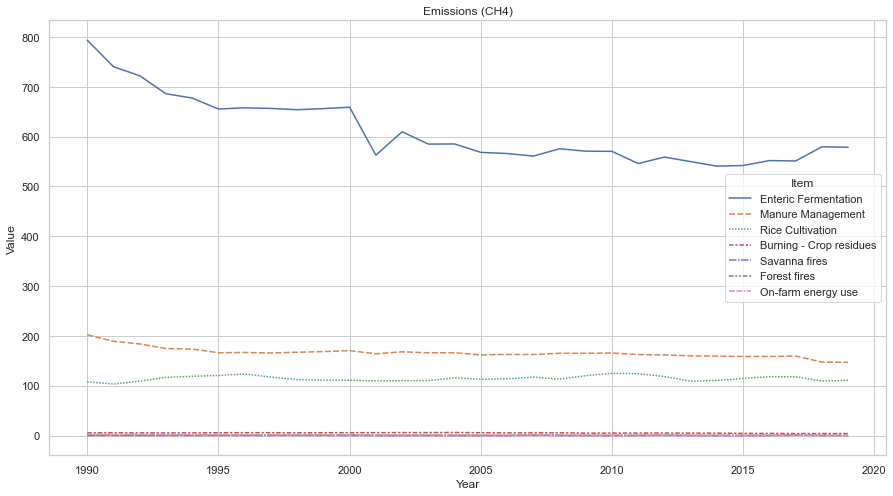

In [280]:
def trend_emissions(df,i):
    x = df.Year
    y = df.Value
    plt.figure(figsize=(15,8))
    sns.lineplot(data=df, x=x, y=y, hue="Item",style = "Item")
    plt.title(i);

for i in set(df_italy.Element):
    df = df_italy[df_italy.Element == i]
    trend_emissions(df,i)

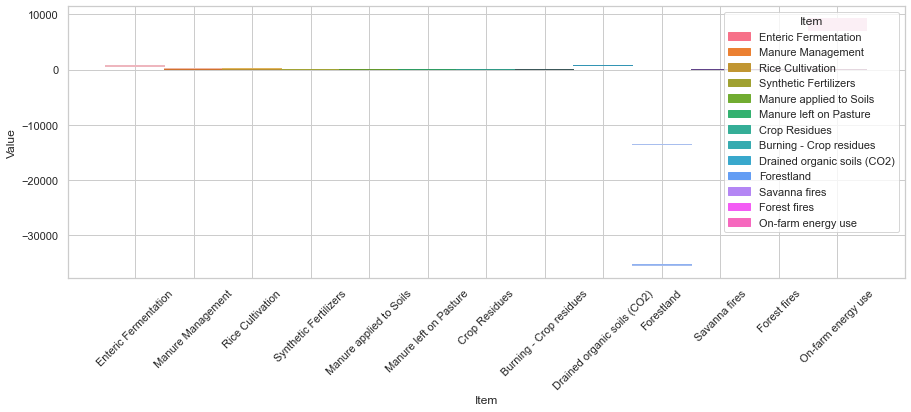

In [293]:
f, ax = plt.subplots(figsize=(15, 5))
sns.histplot(x=df_italy.Item,
            y=df_italy.Value,
            hue=df_italy.Item);
ax.tick_params(axis='x', rotation=45)

In [281]:
#FREQUENCY TABLE 
df_italy.groupby(['Item'])['Element'].count()

Item
Burning - Crop residues        60
Crop Residues                  30
Drained organic soils (CO2)    30
Enteric Fermentation           30
Forest fires                   60
Forestland                     30
Manure Management              60
Manure applied to Soils        30
Manure left on Pasture         30
On-farm energy use             90
Rice Cultivation               30
Savanna fires                  60
Synthetic Fertilizers          30
Name: Element, dtype: int64

In [282]:
# i should get rid of them or normalize the values
df_italy[df_italy.Value <= 1]

,Element Code,Element,Item Code,Item,Year,Value
241,7230,Emissions (N2O),5066,Burning - Crop residues,1990,0.1396
243,7230,Emissions (N2O),5066,Burning - Crop residues,1991,0.1431
245,7230,Emissions (N2O),5066,Burning - Crop residues,1992,0.1386
247,7230,Emissions (N2O),5066,Burning - Crop residues,1993,0.1382
249,7230,Emissions (N2O),5066,Burning - Crop residues,1994,0.1392
...,...,...,...,...,...,...
555,7225,Emissions (CH4),6994,On-farm energy use,2015,0.5870
558,7225,Emissions (CH4),6994,On-farm energy use,2016,0.6294
561,7225,Emissions (CH4),6994,On-farm energy use,2017,0.5586
564,7225,Emissions (CH4),6994,On-farm energy use,2018,0.6209


In [283]:
def plot_hist(df,i):
    plt.figure(figsize=(8,4))
    plt.bar(x=df.Year,height=df.Value)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Years')
    plt.ylabel('Values')
    plt.title(i)

## Emissions (N2O)

In [284]:
n2o = df_italy[df_italy.Element=='Emissions (N2O)']
n2o.describe()

,Element Code,Item Code,Year,Value
count,270.0,270.000000,270.000000,270.000000
mean,7230.0,5684.000000,2004.500000,5.107493
std,0.0,882.221427,8.671515,5.052794
min,7230.0,5059.000000,1990.000000,0.001600
25%,7230.0,5062.000000,1997.000000,0.125250
50%,7230.0,5064.000000,2004.500000,4.170500
75%,7230.0,6795.000000,2012.000000,8.822650
max,7230.0,6994.000000,2019.000000,19.112000


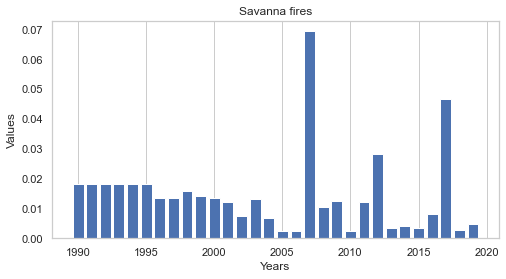

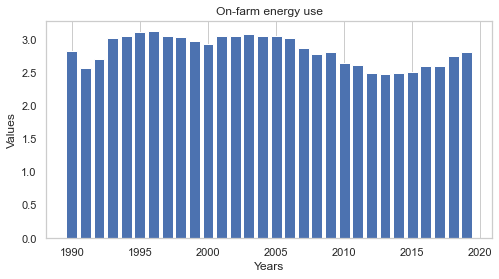

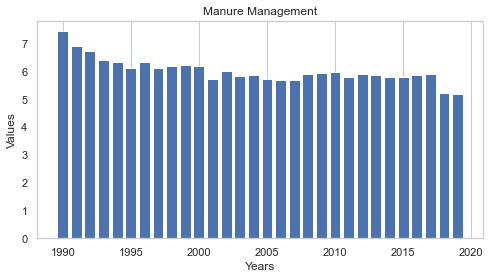

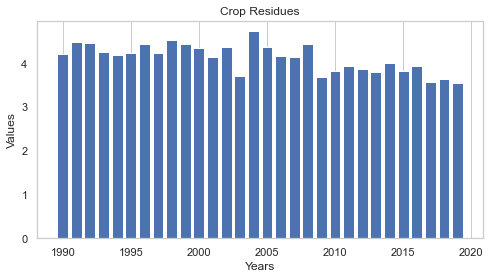

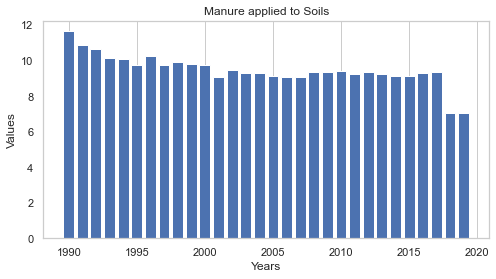

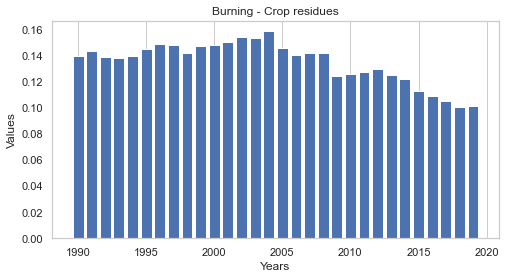

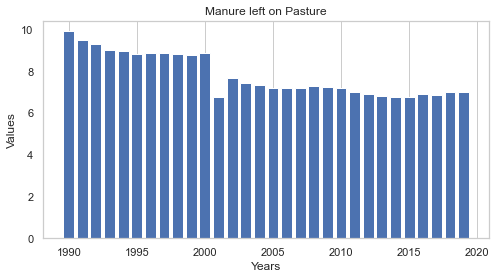

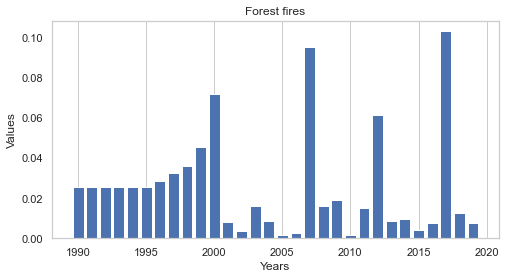

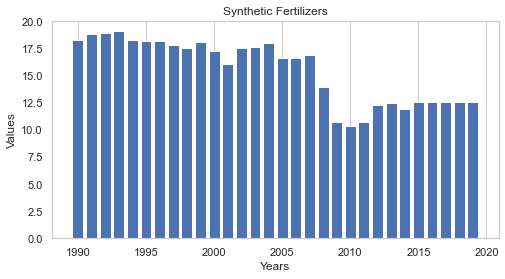

In [285]:
for i in set(n2o.Item):
    df = n2o[n2o.Item==i]
    plot_hist(df,i)

In [286]:
# delete the data related to the fire in the humid tropical forest since the value are 0
n2o_data = n2o[n2o.Item != 'Fires in humid tropical forests']
n2o_data.to_csv('n2o_italy.csv',index=False)

In [217]:
# trying to do correlation plot
values = n2o.Value.groupby(n2o.Item)
n2o_values = n2o[['Item','Value']]

## Emissions (CO2)

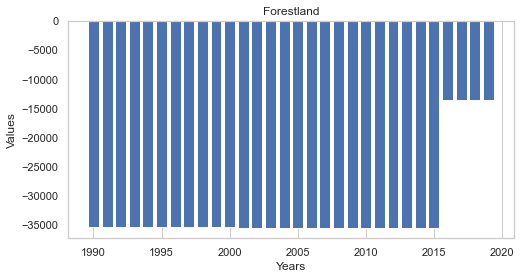

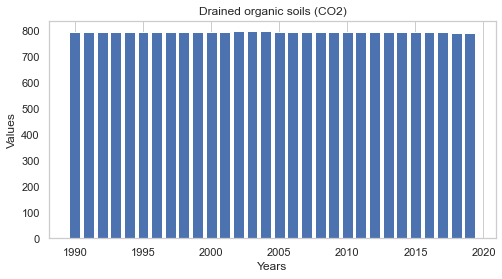

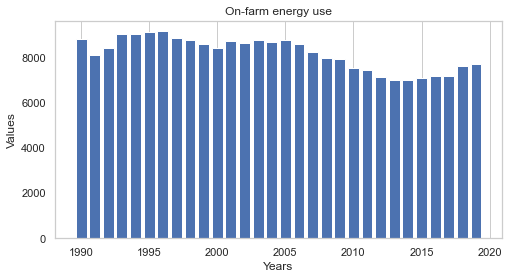

In [287]:
co2 = df_italy[df_italy.Element == 'Emissions (CO2)']
for i in set(co2.Item):
    df = co2[co2.Item==i]
    plot_hist(df,i)

In [288]:
# delete the data related to the net forest conversion and fires in organic soils since the value are 0
co2_data = co2[(co2.Item != 'Net Forest conversion') & (co2.Item !='Fires in organic soils')]
co2_data.to_csv('co2_italy.csv',index=False)

## Emissions (CH4)

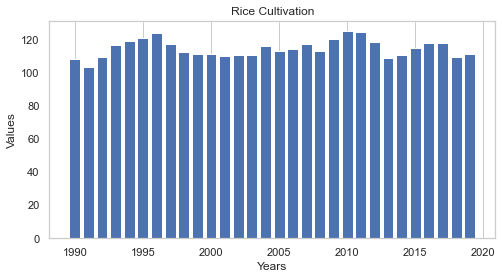

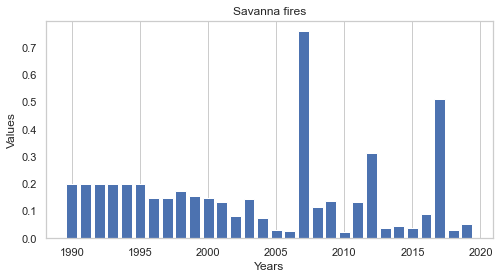

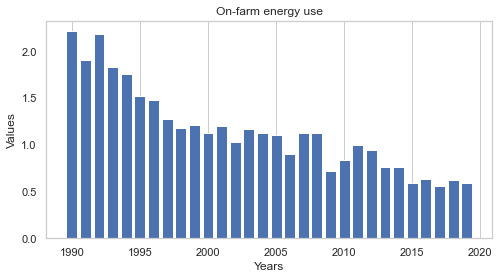

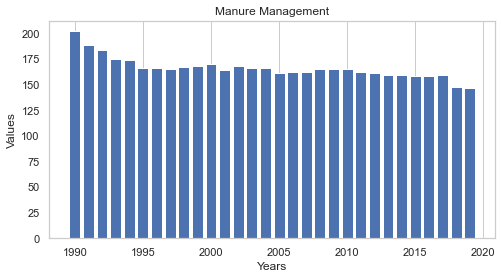

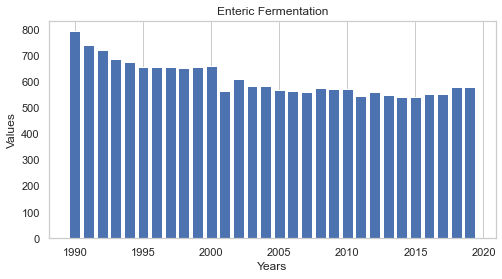

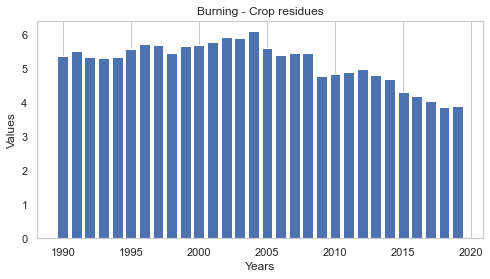

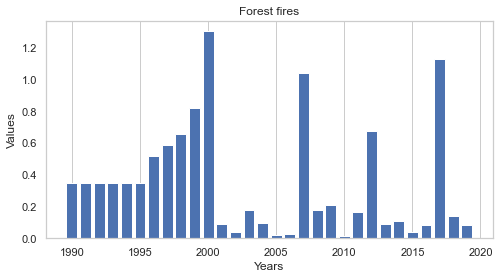

In [289]:
ch4 = df_italy[df_italy.Element == 'Emissions (CH4)']
for i in set(ch4.Item):
    df = ch4[ch4.Item==i]
    plot_hist(df,i)

In [290]:
# delete the data related to the fires in humid forest and  in organic soils since the value are 0
ch4_data = ch4[(ch4.Item != 'Fires in humid tropical forests') & (co2.Item !='Fires in organic soils')]
ch4_data.to_csv('ch4_italy.csv',index=False)

<ipython-input-290-879f2614342c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ch4_data = ch4[(ch4.Item != 'Fires in humid tropical forests') & (co2.Item !='Fires in organic soils')]


## TS FORECASTING

### Element:

7225 = Emissions (CH4)

7230 = Emissions (N2O)

7273 = Emissions (CO2)

### Item:

5058 =  Enteric Fermentation

5059 = Manure Management

5060 = Rice Cultivation

5061 = Synthetic Fertilizers

5062 = Manure applied to Soils

5063 = Manure left on Pasture

5064 = Crop Residues	

5066 = Burning - Crop residues

6994 = On-farm energy use

67292 = Drained organic soils (CO2) 

#### 6751 = Forestland #negativo - da capire perchè

#### 6795 = Savanna fires #valori [0,1] - utili?

#### 6992 = Forest fires #valori [0,1.3] - utili?


In [291]:
df_italy = pd.read_csv('Italy_modified.csv',usecols=cols,index_col='Year')
